<a href="https://colab.research.google.com/github/0-0Jay/Machine-Learning/blob/main/%EC%9E%8E%20%EB%B6%84%EB%A5%98%20%EB%AA%A8%EB%8D%B8%20%EC%B5%9C%EC%A2%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

참고 자료<br>
1. 데이터 라벨링 : https://data-panic.tistory.com/13 <br>
2. 이미지 전처리 : https://luvris2.tistory.com/173 <br>

<h1>데이터 전처리</h1>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# 사전에 모든 이미지를 흑백으로 변경하여 학습

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
import os
from keras.preprocessing import image

In [ ]:
# 데이터 경로 설정
data_dir = '/content/drive/MyDrive/leaf'

# 이미지 데이터 생성기 설정
image_generator = image.ImageDataGenerator(
    rescale=1./255,  # 이미지 값을 0과 1 사이로 정규화
    validation_split=0.2   # 검증용 데이터셋의 비율
)

# 훈련 데이터 생성
train_set = image_generator.flow_from_directory(
    data_dir,
    target_size = (80, 120),  # 이미지 크기 조정
    batch_size = 32,
    class_mode = 'categorical',  # 다중 클래스 분류
    subset = 'training',  # 훈련용 데이터
    color_mode = 'grayscale',
    shuffle = True
)


# 검증 데이터 생성
validation_set = image_generator.flow_from_directory(
    data_dir,
    target_size = (80, 120),
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'validation',  # 검증용 데이터
    color_mode = 'grayscale',
    shuffle = True
)



Found 586 images belonging to 5 classes.
Found 144 images belonging to 5 classes.


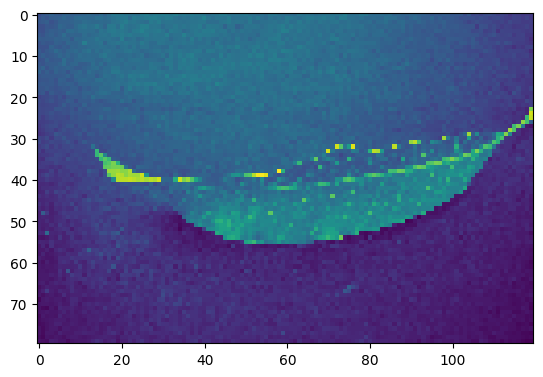

In [ ]:
plt.imshow(train_set[0][0][20])

<h1>이미지 훈련 모델 생성</h1>

In [ ]:
train_set.samples /32  # 1에폭당 몇개의 배치 사이즈가 들어가는지 체크

18.3125

In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(80, 120, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(5, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 78, 118, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 39, 59, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 57, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 18, 28, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 26, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 26624)             0

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')
model.fit(train_set,
          steps_per_epoch = 16,   # 훈련세트 수 / 배치 사이즈
          epochs = 7,
          validation_data = validation_set,
          validation_steps = 16)

Epoch 1/7
16/16 [==============================] - ETA: 0s - loss: 1.5671 - accuracy: 0.2857 

16/16 [==============================] - 646s 40s/step - loss: 1.5671 - accuracy: 0.2857 - val_loss: 1.3528 - val_accuracy: 0.3611
Epoch 2/7
16/16 [==============================] - 76s 5s/step - loss: 1.1997 - accuracy: 0.5694
Epoch 3/7
16/16 [==============================] - 78s 5s/step - loss: 0.8260 - accuracy: 0.6816
Epoch 4/7
16/16 [==============================] - 81s 5s/step - loss: 0.5850 - accuracy: 0.8000
Epoch 5/7
16/16 [==============================] - 79s 5s/step - loss: 0.4437 - accuracy: 0.8571
Epoch 6/7
16/16 [==============================] - 76s 5s/step - loss: 0.3880 - accuracy: 0.8776
Epoch 7/7
16/16 [==============================] - 84s 5s/step - loss: 0.3198 - accuracy: 0.9020


<h1>모델 평가</h1>

In [ ]:
model.evaluate(validation_set)

5/5 [==============================] - 23s 4s/step - loss: 0.2312 - accuracy: 0.9028


[0.23119288682937622, 0.9027777910232544]

<h1>실제 동작 테스트</h1>

Saving mango.jpg to mango (1).jpg


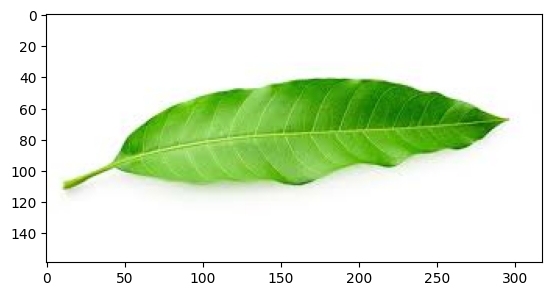

In [ ]:
from google.colab import files
# 사진 업로드 하기
uploaded = files.upload()

img = image.load_img("mango.jpg")
plt.imshow(img)

In [ ]:
target_list = ["Basil", "Chinar", "Jamun", "Lemon", "Mango"]

1/1 [==============================] - 0s 26ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


Mango
확률값
Basil : 0.0002618
Chinar : 0.0001883
Jamun : 0.0000039
Lemon : 0.0000131
Mango : 0.9995329


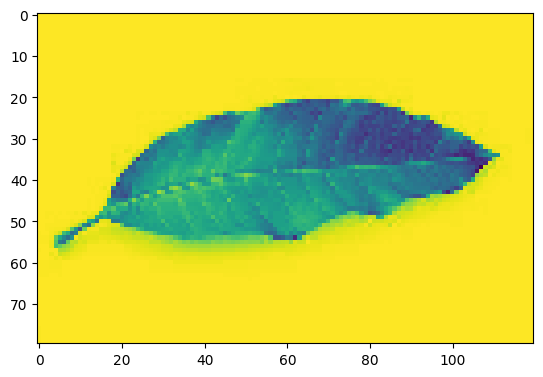

In [ ]:
# 웹에서 찾은 망고 사진으로 테스트
img = image.load_img("mango.jpg", target_size=(80, 120), grayscale=True)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis = 0)
img_array = (255 - img_array) / 255.0  # 배경이 하얀 사진이므로 반전

predict = model.predict(img_array)  # 결과 예측
plt.imshow(img)
print(target_list[np.argmax(predict)])

print("확률값")
for i in range(5):
  print(target_list[i], ':', "%0.7f" % predict[0][i])